In [23]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from subprocess import check_output
from sklearn import tree
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics,datasets, tree

In [2]:
Ecom = pd.read_csv('Shill Bidding Dataset.csv')

In [3]:
Ecom.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [4]:
Ecom.tail()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0
6320,15144,2481,a***l,0.016393,0.043478,0.0,0.340351,0.217391,0.993593,0.340351,0.000000,7,0


In [5]:
Ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [12]:
#converting RecordID, Auction_ID and Bidder_ID to string.
#converting Winning Ratio to integer
Ecom['Record_ID'] = Ecom['Record_ID'].astype(str)
Ecom['Auction_ID'] = Ecom['Auction_ID'].astype(str)
Ecom['Auction_ID'] = Ecom['Bidder_ID'].astype(str)

In [5]:
Ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   object 
 1   Auction_ID              6321 non-null   object 
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 642.1+ KB


In [9]:
Ecom.shape

(6321, 13)

In [10]:
Ecom.describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


C:\Users\Asus\AppData\Local\Temp\ipykernel_34400\2931122491.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Ecom.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(220, 50, as_cmap=True));


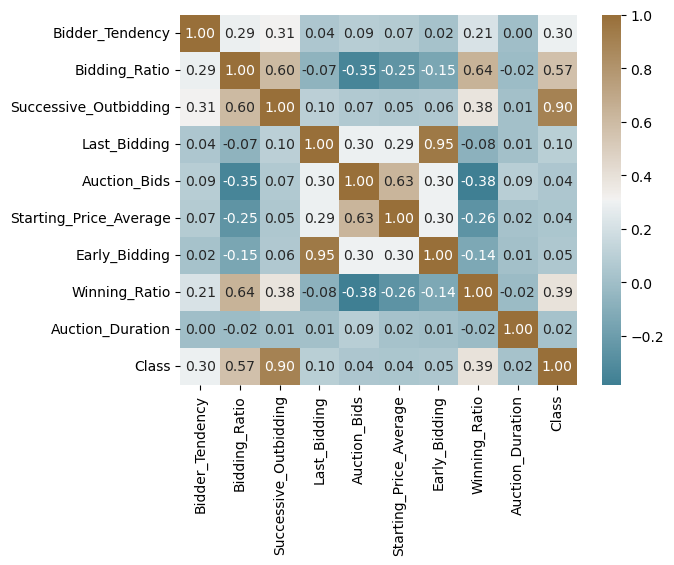

In [6]:
sns.heatmap(Ecom.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(220, 50, as_cmap=True));

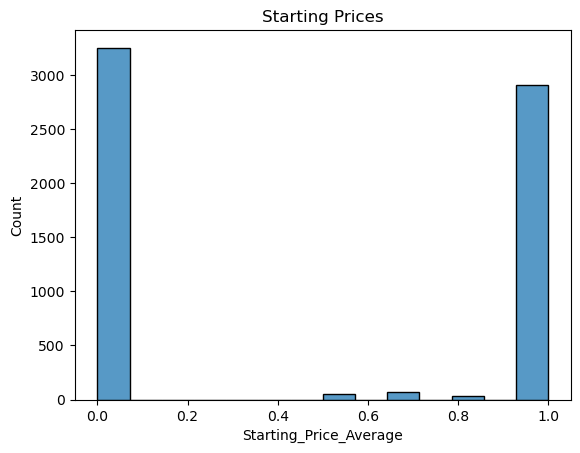

In [16]:
sns.histplot(Ecom.Starting_Price_Average)
plt.title('Starting Prices')
plt.show()

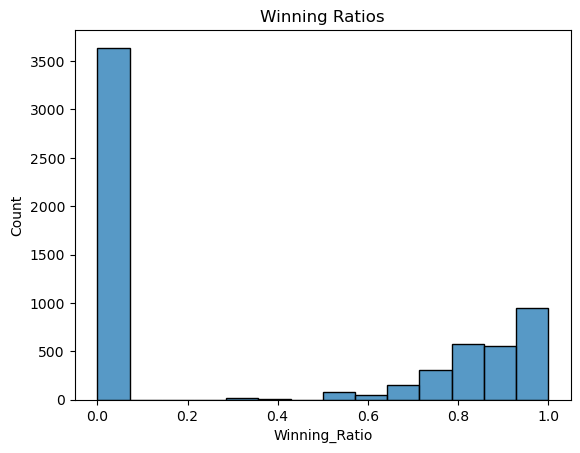

In [18]:
sns.histplot(Ecom.Winning_Ratio)
plt.title('Winning Ratios')
plt.show()

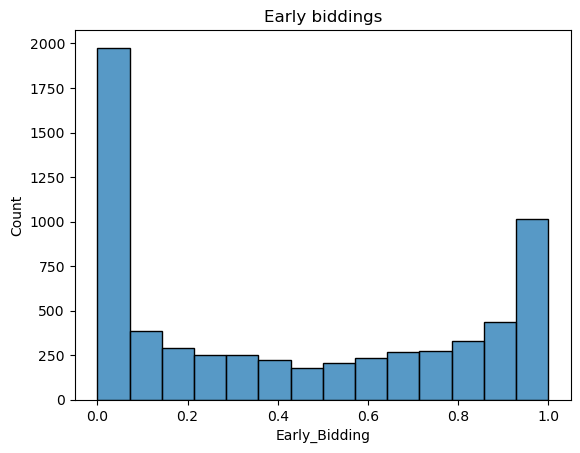

In [19]:
sns.histplot(Ecom.Early_Bidding)
plt.title('Early biddings')
plt.show()

<Axes: title={'center': 'Last_Bidding'}, xlabel='Class'>

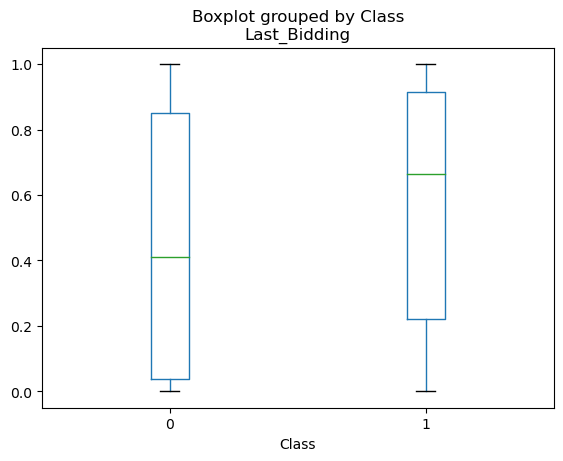

In [28]:
Ecom.boxplot(by ='Class', column =[''], grid = False) 

In [7]:
X=Ecom.iloc[:,[3,4,5,6,7,8,9,11]].values
Y=Ecom.iloc[:,[12]].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [8]:
sc=StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.fit_transform(X_test)
Y_train_s= sc.fit_transform(Y_train)
classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
Y_pred= classifier.predict(X_test_s)
print(Y_pred)

[0 0 0 ... 1 1 0]


In [15]:
acc=metrics.accuracy_score(Y_test,Y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix')
print(cm,"\n\n")
print("---------------------------------------------------------------------------------------------")
result=metrics.classification_report(Y_test,Y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.97


Confusion Matrix
[[1668   34]
 [  28  167]] 


---------------------------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1702
           1       0.83      0.86      0.84       195

    accuracy                           0.97      1897
   macro avg       0.91      0.92      0.91      1897
weighted avg       0.97      0.97      0.97      1897



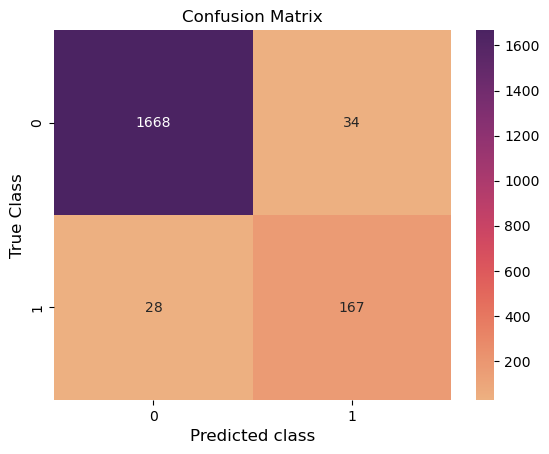

In [16]:
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)

plt.show()

In [11]:
plt.figure(figsize=(12, 8))
tree.plot_tree(classifier, feature_names=Ecom[:,2], class_names=Ecom[:,[12]], filled=True) 
plt.show()

InvalidIndexError: (slice(None, None, None), 2)

<Figure size 1200x800 with 0 Axes>

In [17]:
#although the accuracy is very high let's see if we can boost the accuracy of the predictions by using ADAboosting

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5, random_state=0)
ada.fit(X_train,Y_train)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5,
                   random_state=0)

In [20]:
prediction = ada.predict(X_test)
#now lets estimate this model's accuracy

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1702
           1       0.94      0.99      0.97       195

    accuracy                           0.99      1897
   macro avg       0.97      0.99      0.98      1897
weighted avg       0.99      0.99      0.99      1897



There are two major types of ensemble classification algorithm Techniques: Boosting and bagging techniques. We have explored boosting techniques namely, Decision Trees and Adaboost Algorithms. Now let's explore a bagging technique called "Random Forest Algorithm".

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_classifier.fit(X_train, Y_train)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [32]:
Y_pred = rf_classifier.predict(X_test)

In [34]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9878755930416447
Confusion Matrix:
[[1682   20]
 [   3  192]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1702
           1       0.91      0.98      0.94       195

    accuracy                           0.99      1897
   macro avg       0.95      0.99      0.97      1897
weighted avg       0.99      0.99      0.99      1897

